Text(0.5,1,'Reconstructed (cropped)')

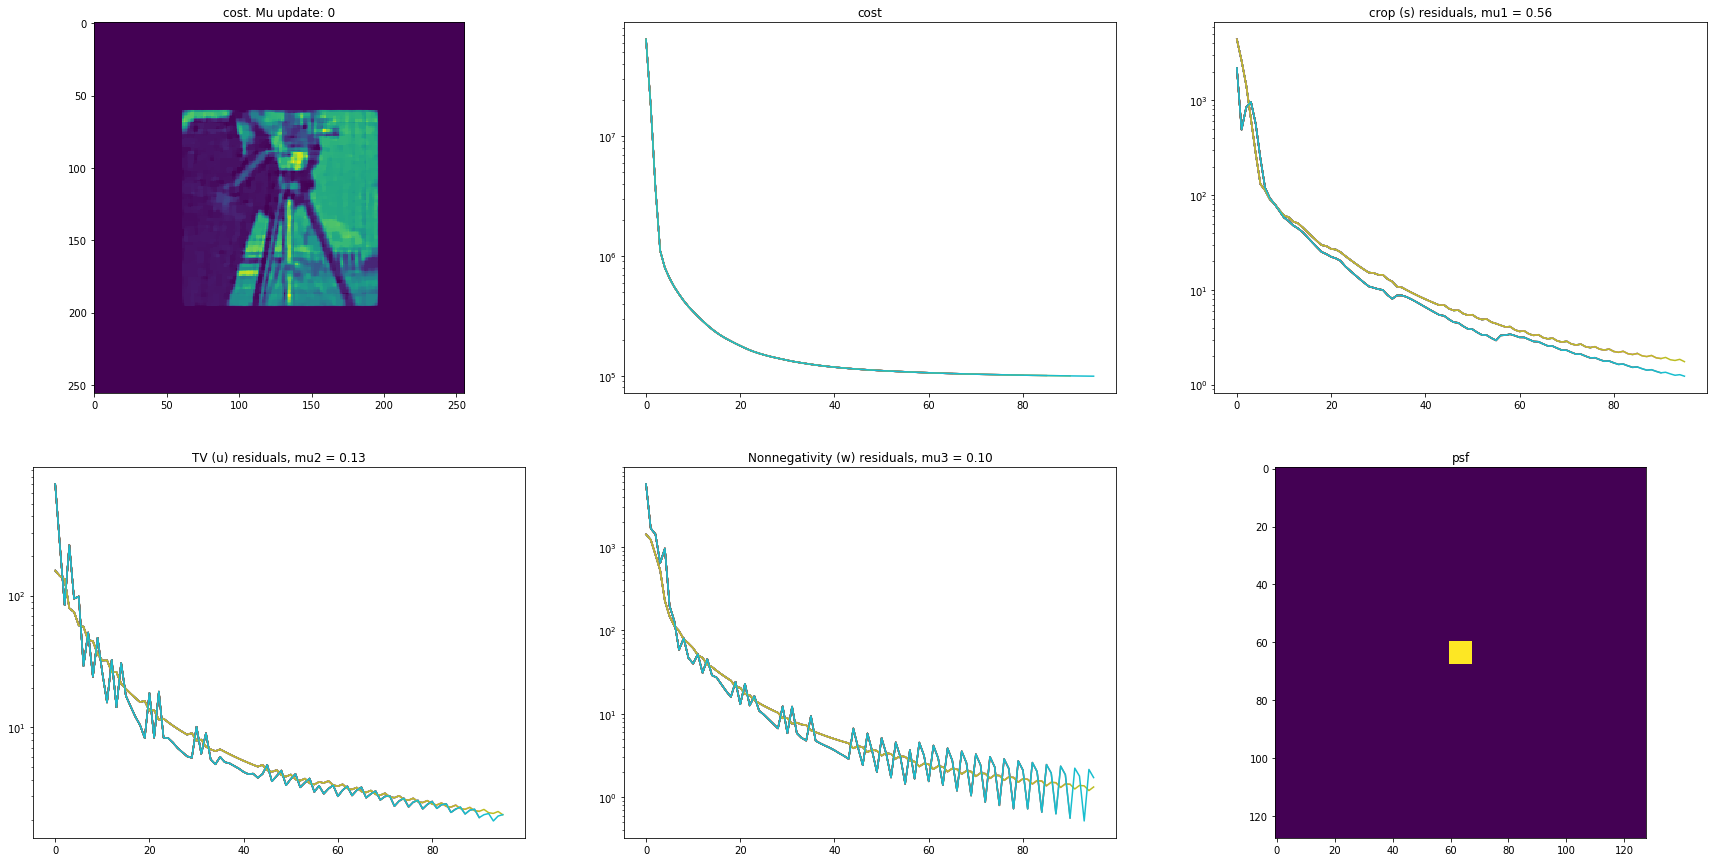

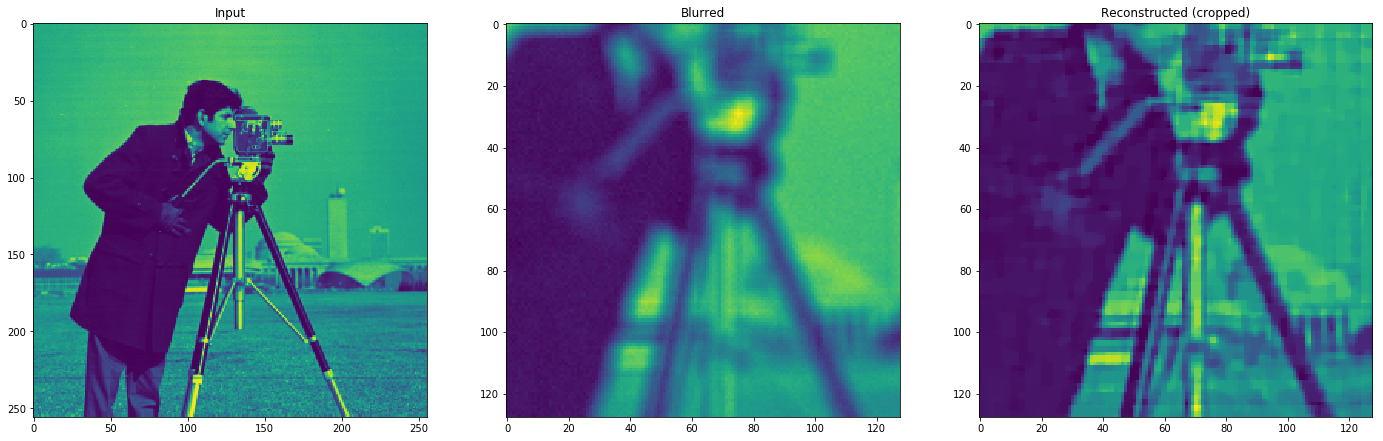

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import autogradLenslets_utils as ag_utils
from PIL import Image
import requests
from io import BytesIO

# Fetch test image
response = requests.get("https://homepages.cae.wisc.edu/~ece533/images/cameraman.tif")
img = np.array(Image.open(BytesIO(response.content)))

# Generate FIR blur kernel
kernel = np.zeros((np.shape(img)[0]//2, np.shape(img)[1]//2))
kernel[60:68, 60:68] = 1
kernel = kernel/np.sum(kernel)

# Blur and add noise
kernel_spectrum = np.fft.fft2(np.fft.ifftshift(ag_utils.pad_func(kernel,.5)))
y = ag_utils.crop_func(ag_utils.fftconv(img, kernel_spectrum), np.shape(kernel)) + 2*np.random.randn(np.shape(img)[0]//2, np.shape(img)[1]//2)

# Reconstruct
reconned_test = ag_utils.admm2d(y, kernel, .1, 100, options=ag_utils.gen_options(disp_interval = 5, fig_size = (30,15)))

# The last arguments options=ag_utils.gen_options can be ommitted and you'll get default behavior. In the example above I'm setting the display interval if you want to watch it converge. 


fig, ax = plt.subplots(1,3, figsize=(24,8))
ax[0].imshow(img)
ax[0].set_title('Input')
ax[1].imshow(y)
ax[1].set_title('Blurred')
ax[2].imshow(ag_utils.crop_func(reconned_test, np.shape(kernel)))
ax[2].set_title('Reconstructed (cropped)')

Estimated Gaussian noise standard deviation = 0.1490105674013852


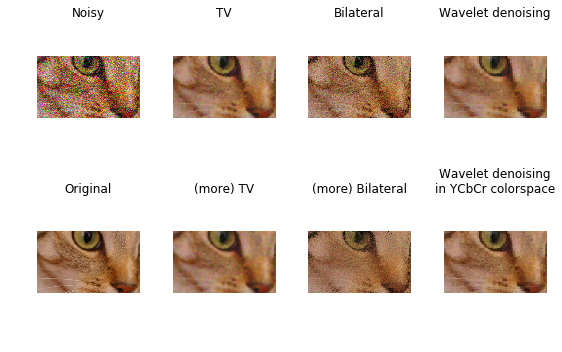

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float, color
from skimage.util import random_noise


original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, multichannel=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()


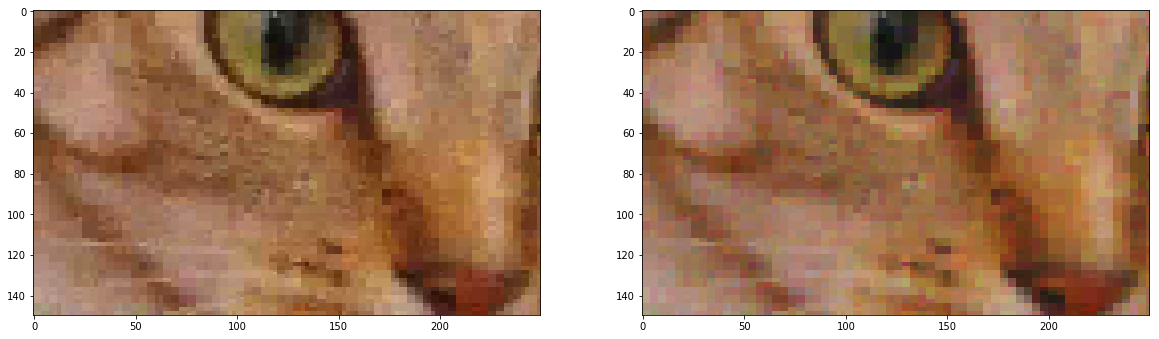

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True))
ax[1].imshow(denoise_wavelet(noisy, multichannel=True))
